In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import spacy
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation

import string
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Assuming your CSV file has columns: date_time, tweet_id, text, username
def load_csv_data(file_path):
    text = pd.read_csv(file_path)
    return text

# Example usage
file_path = '/content/drive/MyDrive/Colab Notebooks/DAIGT.csv'  # Replace 'tweets.csv' with your actual file path
text = load_csv_data(file_path)

# Display the first few rows of the DataFrame
print(text.head(10))

                                                text  labels
0  Regular inactive times are integral to our ove...       1
1  One famous quote by Michelangelo that relates ...       1
2  Attending online classes or video conferencing...       1
3  Making your own decisions in life has many adv...       1
4  Dear Principle,\n\nchanging the policy is a go...       0
5  Rosa Parks became an icon of the civil rights ...       1
6  Everybody would like to be succesful in the li...       0
7  Many people become overwhelmed when they have ...       1
8  I think the people should always accomplish mo...       0
9  Self-esteem is defined as having a positive op...       1


# **Link to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# **Data preprocessing**

In [ ]:
# Initialize NLTK stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function for text cleaning
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Removing Email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)

    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Removing special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    words = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming
    words = [stemmer.stem(word) for word in words]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)


df = pd.DataFrame(text)

# Apply clean_text function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
import nltk
nltk.download('universal_tagset')
# Initialize libraries
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Load the spaCy model
spacy_nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
# List of universal POS tags
universal_tags = [
    'ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X'
]

# **Feature Extraction**

In [ ]:


# Extract text and labels
texts = df['cleaned_text'].tolist()
labels = df['labels'].tolist()


In [ ]:


# 1. Bag of Words (BoW)
#count_vectorizer = CountVectorizer()
#bow_features = count_vectorizer.fit_transform(texts).toarray()

# 2. Term Frequency-Inverse Document Frequency (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(texts).toarray()


# 4. n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2),max_features=15000)
ngram_features = ngram_vectorizer.fit_transform(texts).toarray()

# 5. Part-of-Speech (POS) Tags
#def pos_features(text):
 #   tokens = word_tokenize(text)
  #  pos_tags = pos_tag(tokens, tagset='universal')
   # pos_counts = pd.Series(tag for _, tag in pos_tags).value_counts()
    #return pos_counts.reindex(universal_tags, fill_value=0).values


# 7. Topic Modeling (LDA)
lda_vectorizer = CountVectorizer()
lda_features = lda_vectorizer.fit_transform(texts)

lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda_topics = lda.fit_transform(lda_features)


def sentiment_features(text):
    blob = TextBlob(text)
    return [max(blob.sentiment.polarity, 0), blob.sentiment.subjectivity]  # Ensure non-negative polarity

sentiment_features_matrix = np.array([sentiment_features(text) for text in texts])


# Combine all features
all_features = np.hstack([
    #bow_features,
    tfidf_features,
   # word2vec_features,
    ngram_features,
    lda_topics,
    sentiment_features_matrix
])

# Optionally scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_features)




In [ ]:
print("Scaled Features Shape:", scaled_features.shape)


In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaled_features = scaler.fit_transform(all_features)


In [ ]:
# Check if the scaled features contain negative values
if np.any(scaled_features < 0):
    raise ValueError("Negative values detected in the scaled features.")


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


In [ ]:
print("Min value in scaled features after applying alternative scaler:", np.min(scaled_features))


Min value in scaled features after applying alternative scaler: 0.0


**EDA on Dataset**

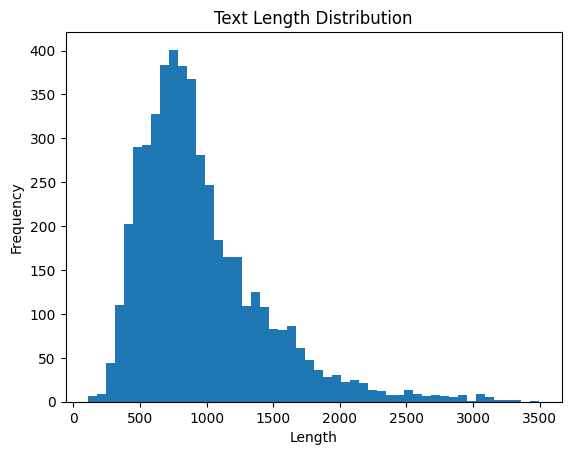

In [ ]:
import matplotlib.pyplot as plt

df['text_length'] = df['cleaned_text'].apply(len)
plt.hist(df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


labels
1    2421
0    2421
Name: count, dtype: int64


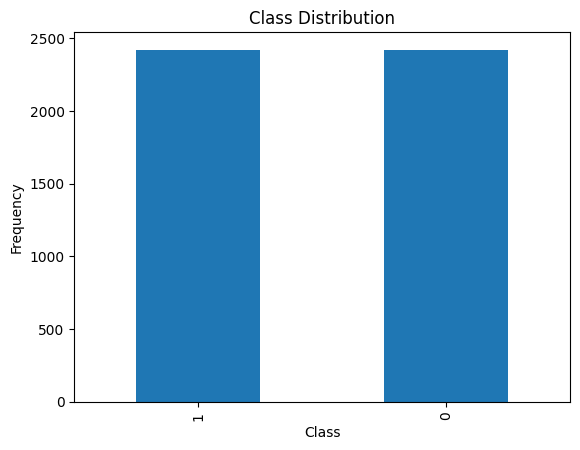

In [ ]:
# Check class distribution
label_counts = df['labels'].value_counts()
print(label_counts)
# Plot class distribution
label_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

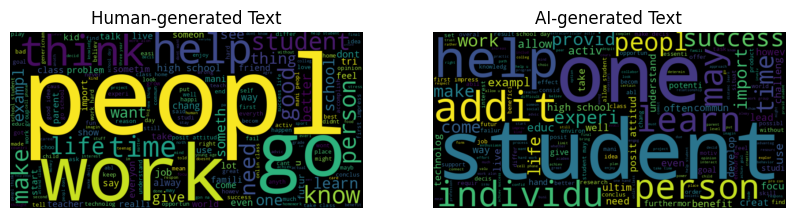

In [ ]:
from wordcloud import WordCloud

human_text = ' '.join(df[df['labels'] == 0]['cleaned_text'])
ai_text = ' '.join(df[df['labels'] == 1]['cleaned_text'])

human_wordcloud = WordCloud(width=800, height=400).generate(human_text)
ai_wordcloud = WordCloud(width=800, height=400).generate(ai_text)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human-generated Text')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('AI-generated Text')
plt.axis('off')

plt.show()


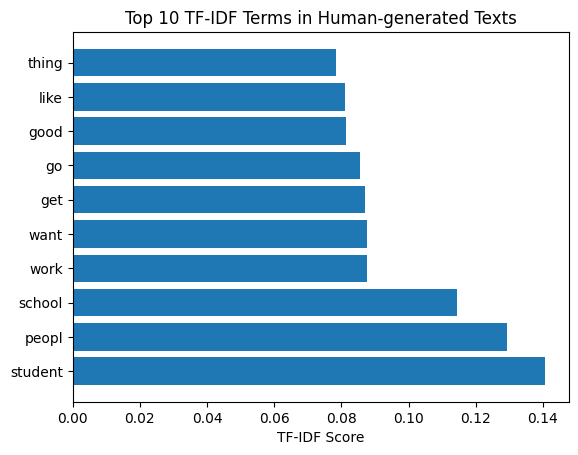

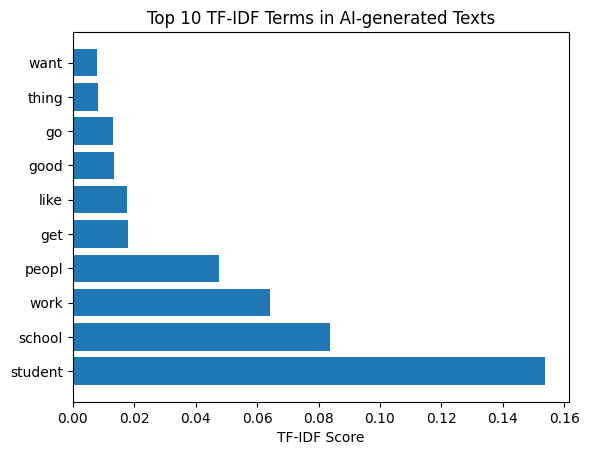

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])
feature_names = tfidf.get_feature_names_out()

human_tfidf = tfidf_matrix[df['labels'] == 0].mean(axis=0).A1
ai_tfidf = tfidf_matrix[df['labels'] == 1].mean(axis=0).A1

tfidf_df = pd.DataFrame({'term': feature_names, 'human_tfidf': human_tfidf, 'ai_tfidf': ai_tfidf})
tfidf_df = tfidf_df.sort_values(by='human_tfidf', ascending=False).head(10)

plt.barh(tfidf_df['term'], tfidf_df['human_tfidf'])
plt.xlabel('TF-IDF Score')
plt.title('Top 10 TF-IDF Terms in Human-generated Texts')
plt.show()

tfidf_df = tfidf_df.sort_values(by='ai_tfidf', ascending=False).head(10)

plt.barh(tfidf_df['term'], tfidf_df['ai_tfidf'])
plt.xlabel('TF-IDF Score')
plt.title('Top 10 TF-IDF Terms in AI-generated Texts')
plt.show()


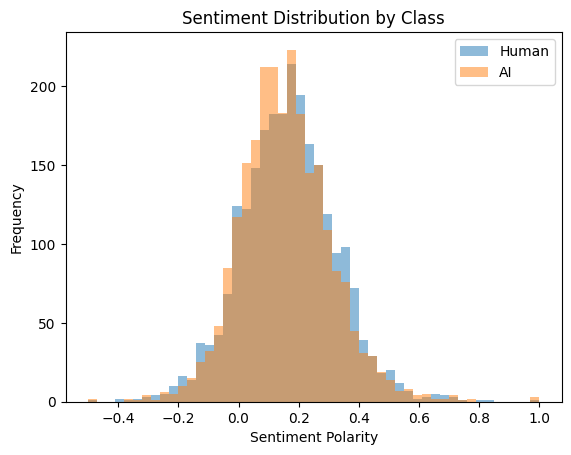

In [ ]:
from textblob import TextBlob

df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(df[df['labels'] == 0]['sentiment'], bins=50, alpha=0.5, label='Human')
plt.hist(df[df['labels'] == 1]['sentiment'], bins=50, alpha=0.5, label='AI')
plt.legend(loc='upper right')
plt.title('Sentiment Distribution by Class')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


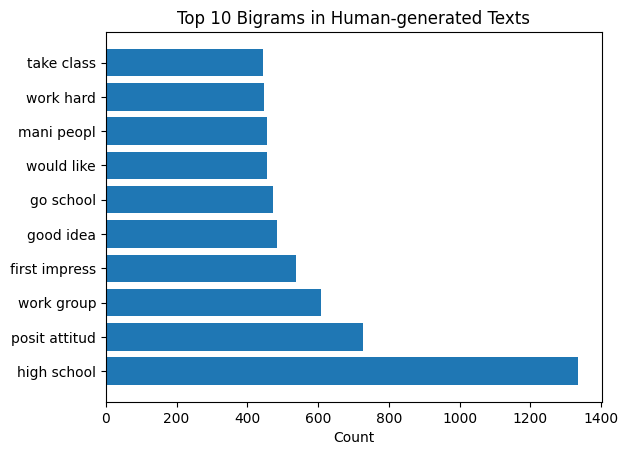

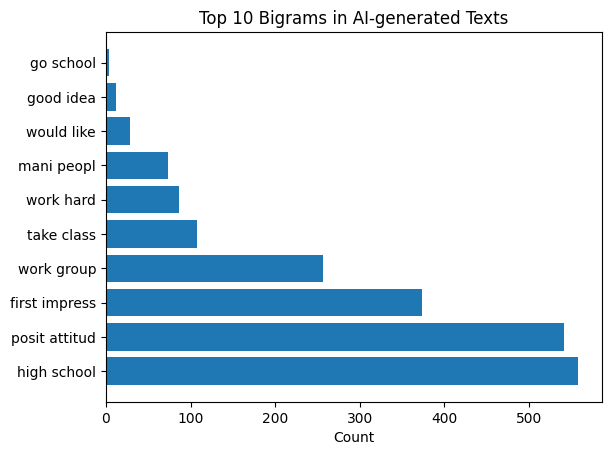

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
ngram_matrix = ngram_vectorizer.fit_transform(df['cleaned_text'])
ngram_feature_names = ngram_vectorizer.get_feature_names_out()

human_ngrams = ngram_matrix[df['labels'] == 0].sum(axis=0).A1
ai_ngrams = ngram_matrix[df['labels'] == 1].sum(axis=0).A1

ngram_df = pd.DataFrame({'ngram': ngram_feature_names, 'human_count': human_ngrams, 'ai_count': ai_ngrams})
ngram_df = ngram_df.sort_values(by='human_count', ascending=False).head(10)

plt.barh(ngram_df['ngram'], ngram_df['human_count'])
plt.xlabel('Count')
plt.title('Top 10 Bigrams in Human-generated Texts')
plt.show()

ngram_df = ngram_df.sort_values(by='ai_count', ascending=False).head(10)

plt.barh(ngram_df['ngram'], ngram_df['ai_count'])
plt.xlabel('Count')
plt.title('Top 10 Bigrams in AI-generated Texts')
plt.show()


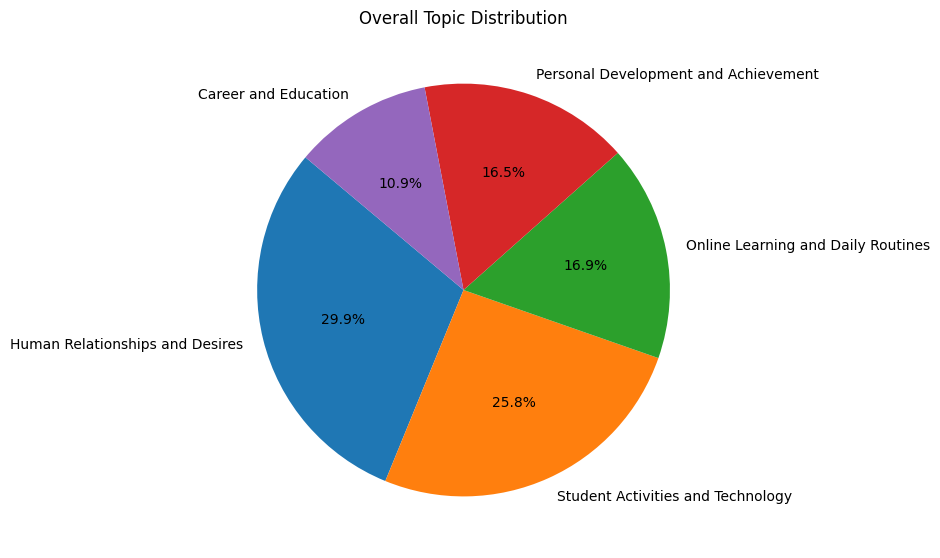

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df['cleaned_text'] contains preprocessed text data

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

# Assign topics to each document
df['topic'] = lda_matrix.argmax(axis=1)

# Define meaningful topic names
topic_names = {
    0: "Personal Development and Achievement",
    1: "Human Relationships and Desires",
    2: "Student Activities and Technology",
    3: "Career and Education",
    4: "Online Learning and Daily Routines"
}

# Map topic indices to topic names
df['topic_name'] = df['topic'].map(topic_names).fillna("Others")

# Calculate overall topic distribution
overall_topics = df['topic_name'].value_counts()

# Plotting pie chart for overall topic distribution
plt.figure(figsize=(8, 6))
plt.pie(overall_topics, labels=overall_topics.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Topic Distribution')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Get feature names (words) from TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Print top words for each topic
n_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


Topic 1:
success failur attitud posit goal achiev life curfew import challeng

Topic 2:
peopl life thing impress want good like person make someth

Topic 3:
student provid activ technolog work decis potenti addit help skill

Topic 4:
student career school work high class group help young want

Topic 5:
student school class onlin time hour home phone day technolog



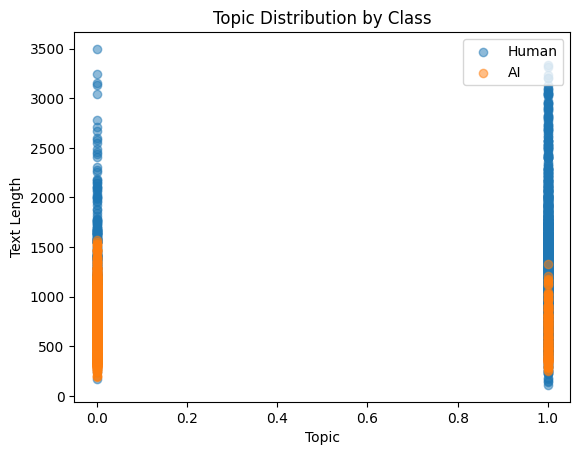

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

df['topic'] = lda_matrix.argmax(axis=1)
plt.scatter(df[df['labels'] == 0]['topic'], df[df['labels'] == 0]['text_length'], alpha=0.5, label='Human')
plt.scatter(df[df['labels'] == 1]['topic'], df[df['labels'] == 1]['text_length'], alpha=0.5, label='AI')
plt.legend(loc='upper right')
plt.title('Topic Distribution by Class')
plt.xlabel('Topic')
plt.ylabel('Text Length')
plt.show()


In [ ]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.8 MB/s eta 0:00:00


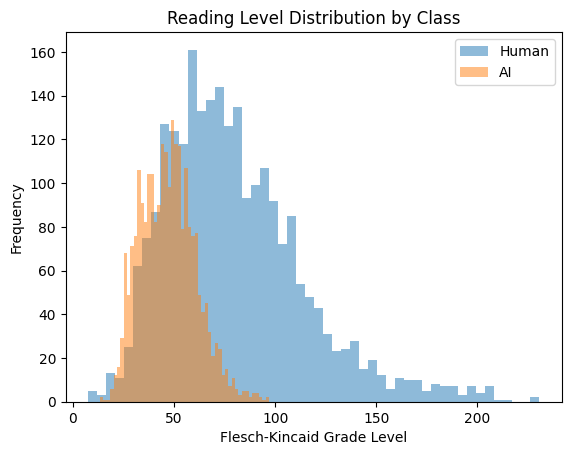

In [ ]:
from textstat import textstat

df['reading_level'] = df['cleaned_text'].apply(textstat.flesch_kincaid_grade)

plt.hist(df[df['labels'] == 0]['reading_level'], bins=50, alpha=0.5, label='Human')
plt.hist(df[df['labels'] == 1]['reading_level'], bins=50, alpha=0.5, label='AI')
plt.legend(loc='upper right')
plt.title('Reading Level Distribution by Class')
plt.xlabel('Flesch-Kincaid Grade Level')
plt.ylabel('Frequency')
plt.show()


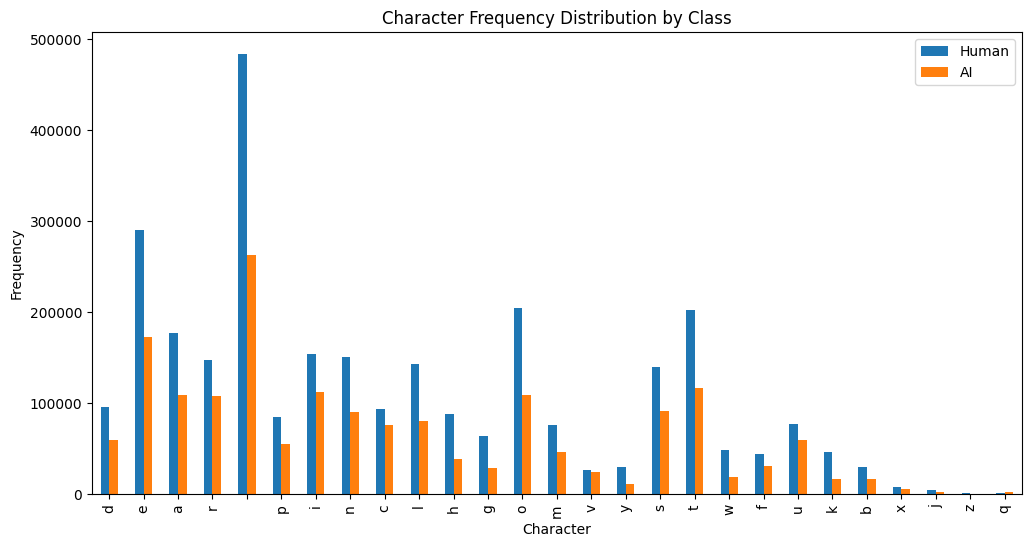

In [ ]:
from collections import Counter

human_chars = Counter(''.join(df[df['labels'] == 0]['cleaned_text']))
ai_chars = Counter(''.join(df[df['labels'] == 1]['cleaned_text']))

char_df = pd.DataFrame([human_chars, ai_chars]).fillna(0).astype(int).T
char_df.columns = ['Human', 'AI']
char_df.plot(kind='bar', figsize=(12, 6))
plt.title('Character Frequency Distribution by Class')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.show()


In [ ]:
human_words = set(' '.join(df[df['labels'] == 0]['cleaned_text']).split())
ai_words = set(' '.join(df[df['labels'] == 1]['cleaned_text']).split())

unique_human_words = human_words - ai_words
unique_ai_words = ai_words - human_words

print(f"Unique words in human-generated texts: {list(unique_human_words)[:10]}")
print(f"Unique words in AI-generated texts: {list(unique_ai_words)[:10]}")


Unique words in human-generated texts: ['schedu', 'activitei', 'impresst', 'scient', 'becau', 'moreand', 'adit', 'homejobschool', 'anna', 'helpfult']
Unique words in AI-generated texts: ['rudolph', 'susten', 'badcan', 'unbeliev', 'reef', 'stressreduc', 'fluenci', 'luxuryfashionadvisorcom', 'preach', 'iii']


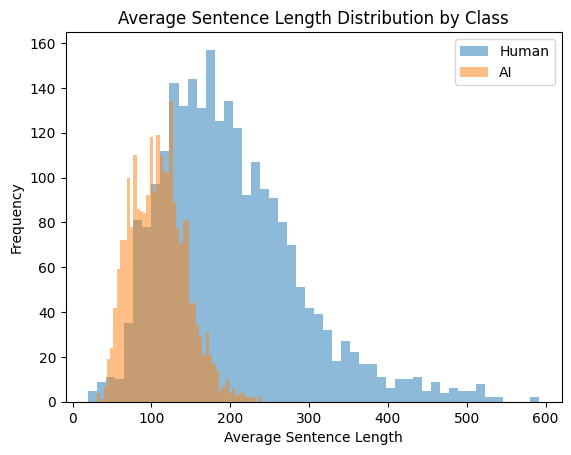

In [ ]:
def get_sentence_lengths(cleaned_text):
    sentences = nltk.sent_tokenize(cleaned_text)
    return [len(nltk.word_tokenize(sentence)) for sentence in sentences]

df['sentence_lengths'] = df['cleaned_text'].apply(get_sentence_lengths)
df['avg_sentence_length'] = df['sentence_lengths'].apply(lambda x: sum(x) / len(x))

plt.hist(df[df['labels'] == 0]['avg_sentence_length'], bins=50, alpha=0.5, label='Human')
plt.hist(df[df['labels'] == 1]['avg_sentence_length'], bins=50, alpha=0.5, label='AI')
plt.legend(loc='upper right')
plt.title('Average Sentence Length Distribution by Class')
plt.xlabel('Average Sentence Length')
plt.ylabel('Frequency')
plt.show()


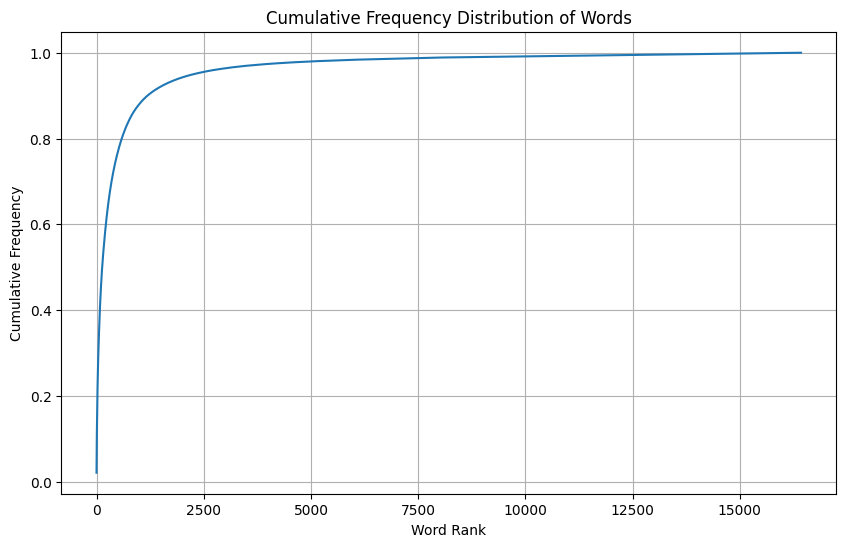

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.text import Tokenizer

# Create a tokenizer without num_words limit to see all words
full_tokenizer = Tokenizer()
full_tokenizer.fit_on_texts(df['cleaned_text'])

# Get word counts
word_counts = full_tokenizer.word_counts
word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
words, counts = zip(*word_counts)

# Cumulative frequency distribution
cumulative_counts = np.cumsum(counts)
cumulative_counts = cumulative_counts / cumulative_counts[-1]

plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts)
plt.title('Cumulative Frequency Distribution of Words')
plt.xlabel('Word Rank')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 782.8 kB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print(tf.__version__)  # Check TensorFlow version


2.17.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(df['cleaned_text'])
X = tokenizer.texts_to_sequences(df['cleaned_text'])


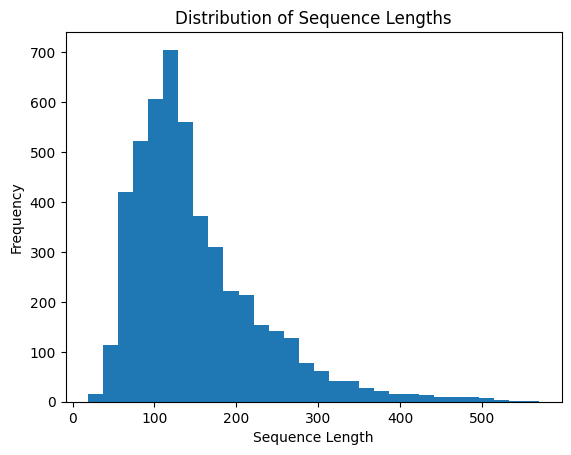

Maximum sequence length: 570


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your list/array of tokenized sequences
sequence_lengths = [len(seq) for seq in X]

# Plotting a histogram of sequence lengths
plt.hist(sequence_lengths, bins=30)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

# Calculate the maximum sequence length based on your analysis
maxlen = np.max(sequence_lengths)
print(f"Maximum sequence length: {maxlen}")


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 500  # Define the max length based on your EDA
X_padded = pad_sequences(X, padding='post', maxlen=maxlen)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=4000)
X_tfidf = tfidf.fit_transform(df['cleaned_text']).toarray()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, df['labels'], test_size=0.2, random_state=42)


## **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=0.5, solver='lbfgs', max_iter=200, class_weight='balanced')
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, class_weight='balanced', max_iter=200)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.63      0.73       492
           1       0.70      0.90      0.79       477

    accuracy                           0.76       969
   macro avg       0.78      0.76      0.76       969
weighted avg       0.78      0.76      0.76       969



# **XGBoost Classifier**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Initialize XGBoost classifier
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',  # Use 'logloss' for binary classification
    use_label_encoder=False,  # If your labels are already in 0, 1 format
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9907120743034056
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       0.99      0.99      0.99       477

    accuracy                           0.99       969
   macro avg       0.99      0.99      0.99       969
weighted avg       0.99      0.99      0.99       969



In [ ]:
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)


# **# MLP classifier**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your preprocessed and split data is X_train, X_test, y_train, y_test
input_shape = X_train.shape[1]
# Define MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),  # input_shape_here should be the number of features
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification, use 'sigmoid'; for multi-class, use 'softmax'
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification; use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model (assuming X_train and y_train are already defined)
# Example: Ensure input data is in the expected format
#model.fit(X_train, y_train, epochs=10, batch_size=32)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Calculate precision, recall, f1-score, and support
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               2740864   
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2749185 (10.49 MB)
Trainable params: 2749185 (10.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
122/122 [==============================] - 5s 8ms/step - loss: 0.1915 - accuracy: 0.9698 - val_loss: 0.0150 - val_accuracy: 0.9959
Epoch 2/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0107 - accuracy: 0.9982 - val_loss: 0.0091 - val_accuracy: 0

# **Ensemble**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming you have preprocessed and split your data
# X_train, X_test, y_train, y_test are your preprocessed features and labels

# Initialize base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('nb', MultinomialNB()),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42))
]

# Initialize meta-model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacking classifier
stacking_model.fit(X_train, y_train)

# Predictions from stacking model
stacking_pred = stacking_model.predict(X_test)

# Evaluate stacking model
accuracy = accuracy_score(y_test, stacking_pred)
print(f'Stacking Ensemble Model Accuracy: {accuracy:.2f}')
# Calculate precision, recall, and F1-score
report = classification_report(y_test, stacking_pred)
print("Classification Report:")
print(report)


Stacking Ensemble Model Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       0.99      0.99      0.99       477

    accuracy                           0.99       969
   macro avg       0.99      0.99      0.99       969
weighted avg       0.99      0.99      0.99       969



In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Define your text cleaning functions
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove Email addresses
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation

    words = word_tokenize(text)  # Tokenization

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  # Remove stop words

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]  # Stemming

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization

    return ' '.join(words)

# Example unseen data
unseen_data = """
homewor is given to the students from the teacher so that they can practice from home. on basis of their practice teacher can take quiz and then assess the students. people should be hinest with their home work if they tried to copy someone and do not input their effort it can be useless for them.
"""
unseen="""Doing homework is a practice that reinforces learning outside the classroom. It helps students consolidate their understanding of topics covered in lessons. Completing assignments cultivates discipline and responsibility, preparing individuals for academic and professional challenges ahead. Ultimately, homework serves as a bridge between theoretical knowledge and practical application in real-world scenarios."""
# Clean and preprocess the unseen data
cleaned_unseen_data = clean_text(unseen_data)

# Tokenize and pad sequences
max_length = 100  # Assuming the same max length used during training
tokenizer = tokenizer  # Assuming you have loaded the tokenizer used during training
sequences = tokenizer.texts_to_sequences([cleaned_unseen_data])
X_unseen = pad_sequences(sequences, maxlen=max_length)

# Load your trained model
#model = load_model('path_to_your_model.h5')  # Replace with the path to your saved model

# Predict probabilities for the unseen data
predictions = model.predict(X_unseen)

# Assign labels based on the predicted probabilities
threshold = 0.5  # Adjust as needed
predicted_label = 1 if predictions[0] > threshold else 0

# Print the predicted label
print(f'Predicted Label: {predicted_label}')


1/1 [==============================] - 1s 592ms/step
Predicted Label: 0


# **GridSearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'C': 10}


In [ ]:
from sklearn.metrics import classification_report

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73       492
           1       0.70      0.90      0.79       477

    accuracy                           0.76       969
   macro avg       0.78      0.76      0.76       969
weighted avg       0.78      0.76      0.76       969



# **SVM**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Step 3: SVM Training with specified parameters
svm = SVC(C=10, kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)

# Evaluation on Test Data
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       492
           1       0.99      1.00      0.99       477

    accuracy                           0.99       969
   macro avg       0.99      0.99      0.99       969
weighted avg       0.99      0.99      0.99       969



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier with specified parameters
rf = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=None,         # Maximum depth of the tree
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    max_features='auto',    # Number of features to consider when looking for the best split
    bootstrap=True,         # Whether bootstrap samples are used when building trees
    random_state=42         # Random state for reproducibility
)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       492
           1       0.99      1.00      0.99       477

    accuracy                           0.99       969
   macro avg       0.99      0.99      0.99       969
weighted avg       0.99      0.99      0.99       969



# **Naive bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize the Multinomial Naive Bayes classifier with specified parameters
nb = MultinomialNB(
    alpha=1.0,               # Additive smoothing parameter (Laplace/Lidstone smoothing)
    fit_prior=True,          # Whether to learn class prior probabilities or not
    class_prior=None         # Prior probabilities of the classes (default is None)
)

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       0.99      0.99      0.99       477

    accuracy                           0.99       969
   macro avg       0.99      0.99      0.99       969
weighted avg       0.99      0.99      0.99       969



In [ ]:
!pip install transformers

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3873, 500)
y_train shape: (3873,)
X_test shape: (969, 500)
y_test shape: (969,)


# **Machine learning Model comparison**

In [ ]:
logistic_regression_accuracy = 0.98
xgboost_accuracy = 0.99
naive_bayes_accuracy = 0.99
svm_accuracy = 0.99
random_forest_accuracy = 0.99
ensemble_accuracy = 0.99


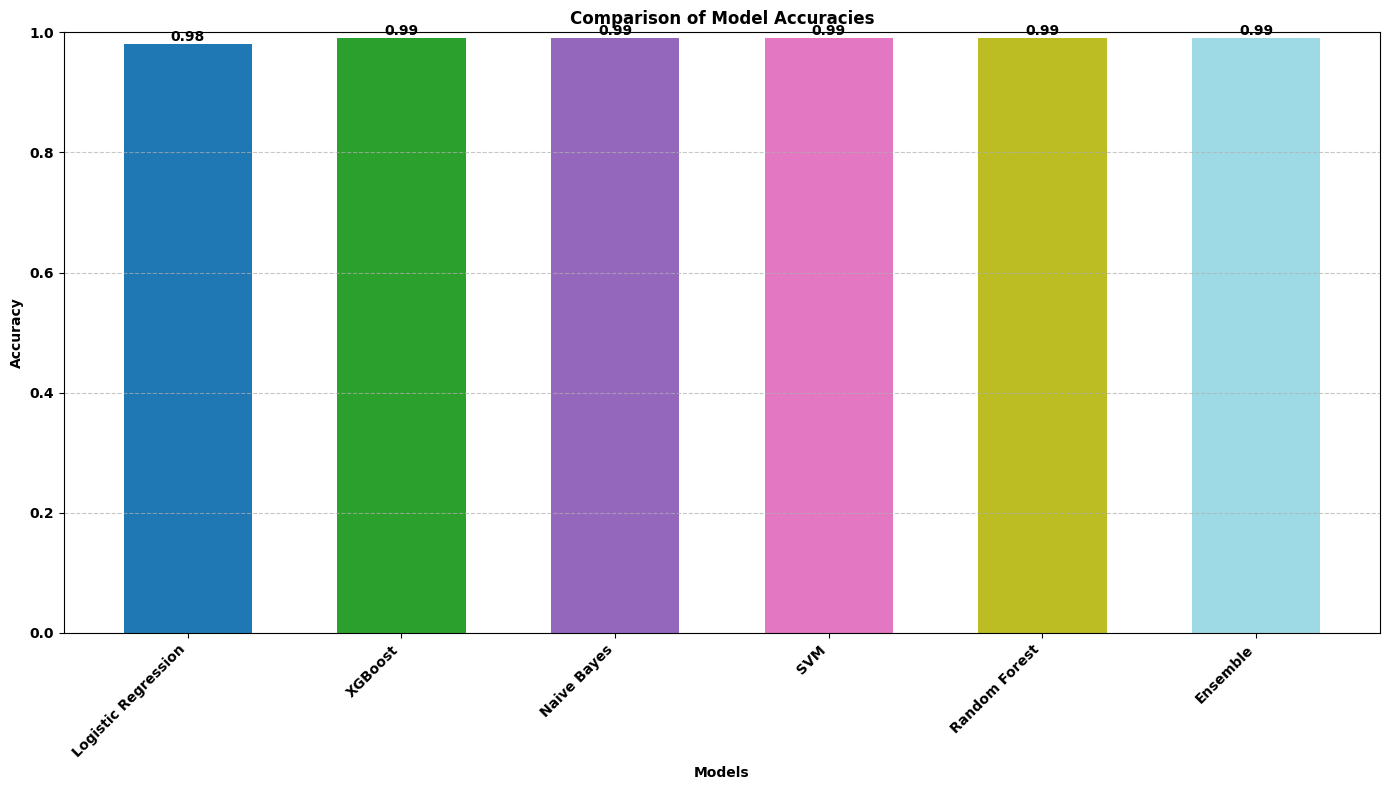

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracies of different models
model_names = [
    'Logistic Regression', 'XGBoost', 'Naive Bayes', 'SVM', 'Random Forest', 'Ensemble'
]
accuracies = [
    logistic_regression_accuracy, xgboost_accuracy, naive_bayes_accuracy,
    svm_accuracy, random_forest_accuracy, ensemble_accuracy
]

# Generate a list of different colors
colors = plt.cm.tab20(np.linspace(0, 1, len(model_names)))

# Plotting the bar graph
plt.figure(figsize=(14, 8))
bars = plt.bar(model_names, accuracies, color=colors, width=0.6)

# Set bold text for labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Comparison of Model Accuracies', fontweight='bold')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1

# Make the x-axis tick labels (model names) bold
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')
# Add grid and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add accuracy labels on top of each bar with bold text
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}',
             va='bottom', ha='center', fontweight='bold')  # Bold text

plt.show()
